In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
df_original = pd.read_csv("water_potability.csv")


In [ ]:
df_original.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df_original.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df_original["ph"].mean()

7.080794504276835

In [ ]:
df_original['Hardness'].mean()

196.36949601730151

In [ ]:
df_original['Solids'].mean()

22014.092526077104

In [ ]:
df_original['Chloramines'].mean()

7.122276793425786

In [ ]:
df_original['Sulfate'].mean()

333.7757766108135

In [ ]:
df_original['Conductivity'].mean()

426.20511068255325

In [ ]:
df_original['Organic_carbon'].mean()

14.284970247677318

In [ ]:
df_original['Trihalomethanes'].mean()

66.39629294676803

In [ ]:
df_original['Turbidity'].mean()

3.966786169791058

In [ ]:
df_original['Potability'].mean()

0.3901098901098901

In [ ]:
df_original.ph = df_original.ph.fillna(7.080794504276835, inplace=False)

In [ ]:
df_original.Hardness = df_original.Hardness.fillna(196.36949601730151, inplace=False)

In [ ]:
df_original.Solids = df_original.Solids.fillna(22014.092526077104, inplace=False)

In [ ]:
df_original.Chloramines = df_original.Chloramines.fillna(7.122276793425786, inplace=False)

In [ ]:
df_original.Sulfate = df_original.Sulfate.fillna(333.7757766108135, inplace=False)

In [ ]:
df_original.Conductivity = df_original.Conductivity.fillna(426.20511068255325, inplace=False)

In [ ]:
df_original.Organic_carbon = df_original.Organic_carbon.fillna(14.284970247677318, inplace=False)

In [ ]:
df_original.Trihalomethanes = df_original.Trihalomethanes.fillna(66.39629294676803, inplace=False)

In [ ]:
df_original.Turbidity = df_original.Turbidity.fillna(3.966786169791058, inplace=False)

In [ ]:
df_original.Potability = df_original.Potability.fillna(0.3901098901098901, inplace=False)

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df_original

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df_original.columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability' ]

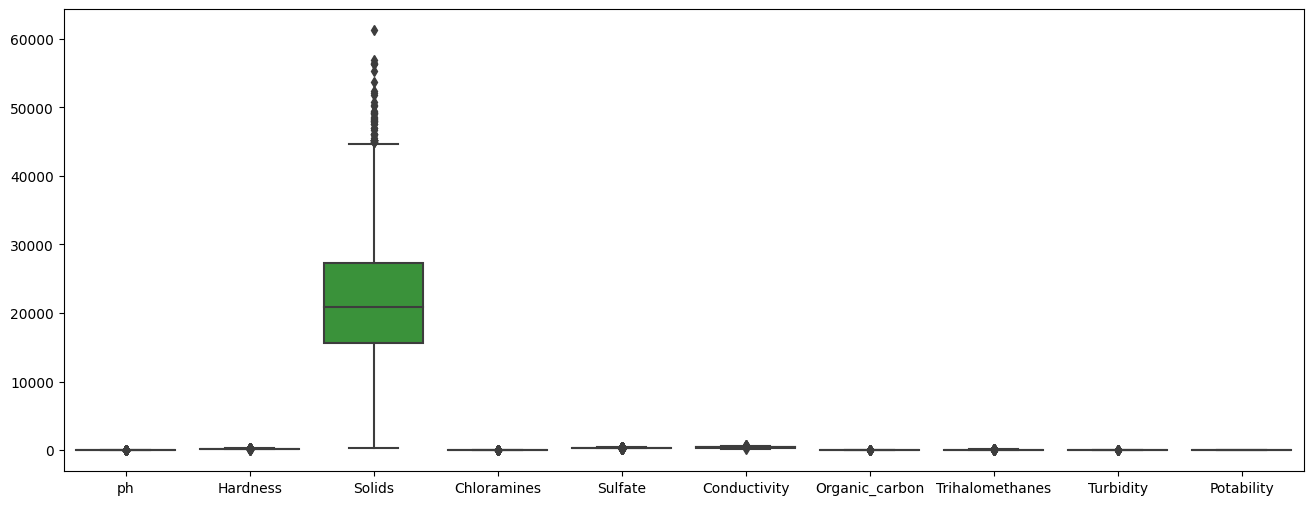

In [ ]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_original)

In [ ]:
obj_padronizacao = StandardScaler().fit(df_original)

In [ ]:
df_padronizado = obj_padronizacao.transform(df_original)

In [ ]:
df_padronizado

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
         1.30614943e+00, -1.28629758e+00, -7.99774743e-01],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
        -6.38479983e-01,  6.84217891e-01, -7.99774743e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         1.50940884e-03, -1.16736546e+00, -7.99774743e-01],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
         2.18748247e-01, -8.56006782e-01,  1.25035206e+00],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
         7.03468419e-01,  9.50797383e-01,  1.25035206e+00],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         7.80223466e-01, -2.12445866e+00,  1.25035206e+00]])

In [ ]:
df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability' ]


In [ ]:
df_padronizado.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298,-0.799775
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218,-0.799775
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365,-0.799775
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412,-0.799775
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786,-0.799775


In [ ]:
df_padronizado.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03
mean,-4.684897e-16,1.024821e-15,-4.012528e-17,5.205441e-16,1.587660e-15,1.708035e-16,2.385827e-17,1.691768e-16,5.487403e-16,7.808162e-17
std,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00
min,-4.817747e+00,-4.530454e+00,-2.474344e+00,-4.277288e+00,-5.666636e+00,-3.028290e+00,-3.653635e+00,-4.164160e+00,-3.225560e+00,-7.997747e-01
25%,-5.464412e-01,-5.937372e-01,-7.239916e-01,-6.285247e-01,-4.616071e-01,-7.482911e-01,-6.709187e-01,-6.182751e-01,-6.755095e-01,-7.997747e-01
50%,-6.043133e-16,1.819424e-02,-1.238999e-01,5.068209e-03,3.145987e-15,-5.345935e-02,-2.014487e-02,0.000000e+00,-1.507005e-02,-7.997747e-01
75%,5.370064e-01,6.174333e-01,6.066532e-01,6.271058e-01,4.596379e-01,6.878605e-01,6.870970e-01,6.513609e-01,6.837866e-01,1.250352e+00
max,4.707802e+00,3.855680e+00,4.472689e+00,3.793631e+00,4.074895e+00,4.048144e+00,4.237147e+00,3.653325e+00,3.552921e+00,1.250352e+00


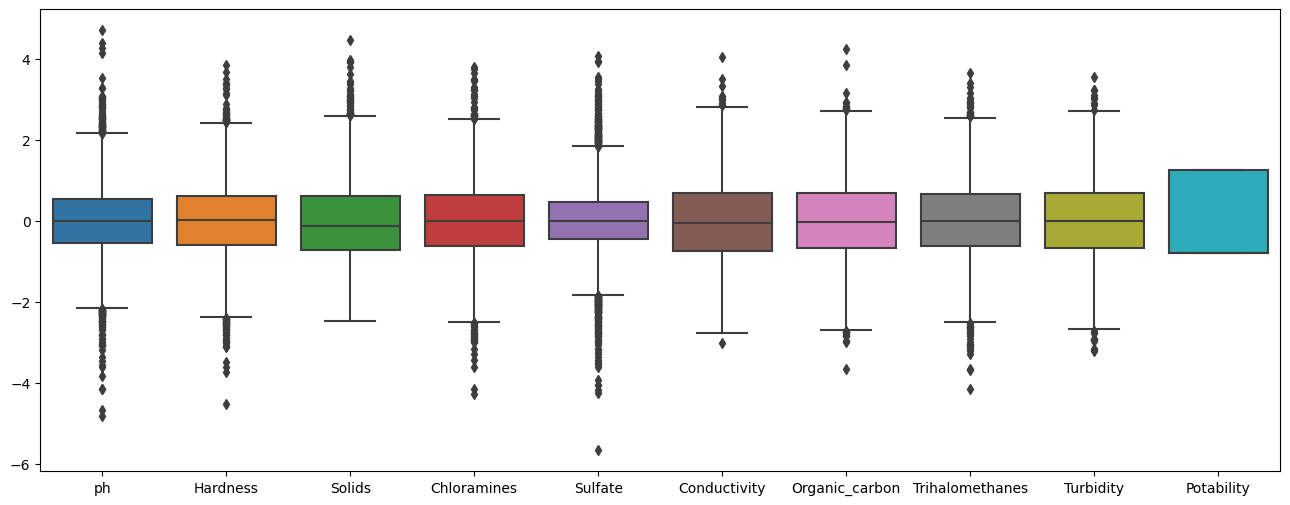

In [ ]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_padronizado)

In [ ]:
obj_normalizacao = MinMaxScaler().fit(df_original)

In [ ]:
df_normalizado = obj_normalizacao.transform(df_original)

In [ ]:
df_normalizado

array([[0.50577104, 0.57113901, 0.33609646, ..., 0.69975313, 0.28609102,
        0.        ],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.4509993 , 0.57679264,
        0.        ],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.5328657 , 0.30363656,
        0.        ],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.56065454, 0.34956996,
        1.        ],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.62265916, 0.61611996,
        1.        ],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.63247754, 0.16244074,
        1.        ]])

In [ ]:
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability' ]

In [ ]:
df_normalizado.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0


In [ ]:
df_normalizado.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.505771,0.540231,0.356173,0.529963,0.581699,0.427940,0.463026,0.532673,0.475853,0.390110
std,0.104997,0.119263,0.143968,0.123921,0.102669,0.141336,0.126750,0.127938,0.147548,0.487849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448405,0.469432,0.251957,0.452088,0.534313,0.322196,0.378000,0.453584,0.376198,0.000000
50%,0.505771,0.542401,0.338338,0.530591,0.581699,0.420386,0.460473,0.532673,0.473630,0.000000
75%,0.562146,0.613857,0.443498,0.607662,0.628882,0.525145,0.550102,0.615994,0.576729,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


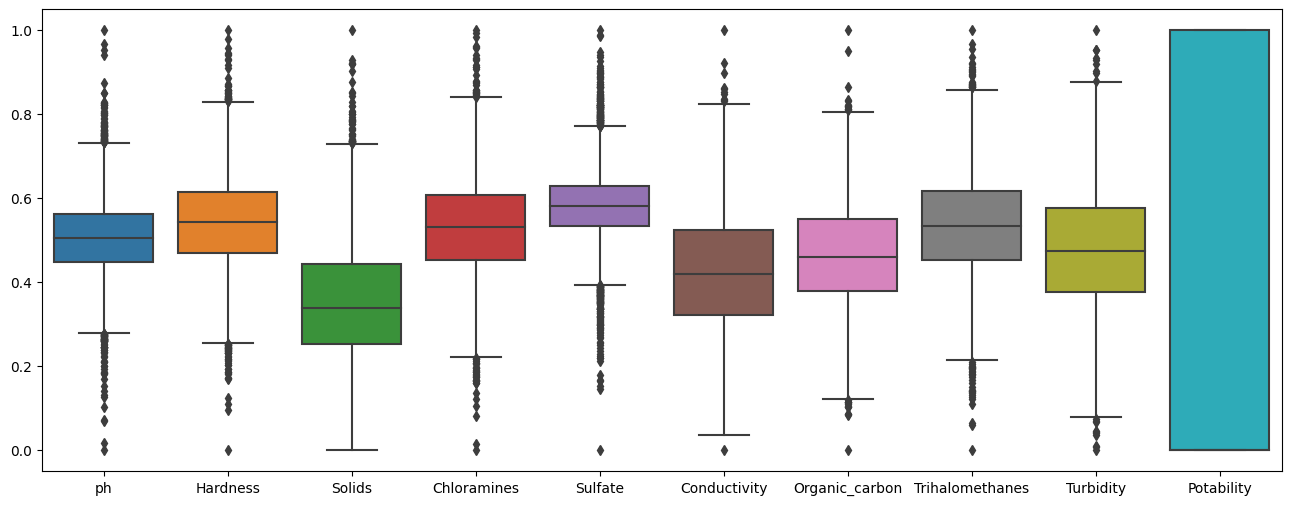

In [ ]:
plt.figure(figsize = (16,6))
ax = sns.boxplot(data = df_normalizado)

In [ ]:
VAR_PREDITORAS_ORIG = df_original.drop('Potability', axis = 1)

In [ ]:
VAR_TARGET = df_original['Potability']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_ORIG, VAR_TARGET, test_size = 0.3, random_state = 10)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
resultados = knn.predict(X_test)

In [ ]:
score = accuracy_score(Y_test, resultados)

In [ ]:
score

0.572736520854527

In [ ]:
VAR_PREDITORAS_NORM = df_normalizado.drop('Turbidity', axis = 1)

In [ ]:
VAR_TARGE = df_original['Turbidity']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_NORM, VAR_TARGET, test_size = 0.3, random_state = 10)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
resultados = knn.predict(X_test)

In [ ]:
score = accuracy_score(Y_test, resultados)

In [ ]:
score

0.62970498474059